<a href="https://colab.research.google.com/github/DataAnalysis-python/soccer-FIFA/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC%20%EC%9D%B4%EC%A0%81%EB%A3%8C%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="text-align: right"> <b>201984044 ICT공학부 김희성</b></div>
<div style="text-align: right"> <b>201904073 소프트웨어전공 윤선미</b></div>

<h1>목차 <br>
<h2>1. 서론<br>
<ul>
제안배경<br>
목적<br>
가설<br>
</ul>
<h2> 2. 데이터 전처리<br>
<ul>
2.1데이터프레임 데이터<br>
2.2데이터 추출<br>
2.3 contract_untill (계약기간)<br>
2.3 value (이적료) <br>

</ul>

<h2>3. 데이터 분석 및 시각화<br>
<ul>
3.1이적료의 분석<br>
3.2 인기도와 현재 능력관계에 대한 선수의 가치<br>
3.3 잠재능력과 선수능력 사이의 이적료<br>
3.4 이적료와 인기도관계<br>
3.4 이적료와 계약기간<br>
</ul>
<h2>4. 결론<br>





---


##**1. 서론**
<br>

<h5><li>제안배경
<ul>
축구 이적료는 현대 축구에서 중요한 경제적 요소로 자리 잡았습니다. <br>
선수들의 이적은 클럽 간 경쟁력을 향상시키는 데 결정적인 역할을 하며, 이적료의 크기는 선수의 인기와 능력, 그리고 이적 시장의 동향에 따라 변동됩니다.<br>

이적료란 계약기간이 6개월 이상 남아 있는 프로선수가 소속된 팀과의 계약이 만료되지 않는 상황에서 다른 팀으로 옮기고자 할 때 선수를 영입하려는 새로운 구단이 원 소속구단에게 지급하는 비용입니다.<br>
 <br>
</ul>
 <br>

<h5><li>목적
<ul>
이적료 데이터의 분석은 축구의 경제적 측면을 이해하고, 선수의 가치를 판단하며, 이적 시장의 동향을 예측하는 데 도움을 줄 수 있습니다.<br>
본 데이터 분석은 축구 이적료 데이터를 분석하여 그에 관한 영향 요소를 조사하고자 합니다. <br>

이를 위해 데이콘(https://dacon.io/competitions/open/235538/overview/description)에서 데이터를 가져왔습니다.<br>
이 데이터를 바탕으로 이적료의 평균값, 최대값, 최소값 등을 계산하여 이적료의 범위와 분포를 확인할 것입니다.<br>
또한, 이적료와 선수의 연령, 국적, 포지션 등 다양한 특성 간의 상관 관계를 분석하여, 어떤 요소들이 이적료에 영향을 미치는지 파악하고자 합니다.<br>

이적료 데이터의 분석을 통해 미래의 이적 시장 동향을 예측하는 데 도움을 주고, 선수의 가치 평가에도 유용한 정보를 제공할 수 있을 것입니다.<br>
<br>
</ul>
<h5><li>가설<br>
<ul>
1. 선수의 현재 능력치가 가장 영향을 많이 미칠 것이다. <br>
2. 선수의 계약 기간이 많이 남을 수록 더 많은 이적료가 요구될 것 이다. <br>




---
## **2. 데이터 전처리**


<ul>
<h4>2.1 데이터프레임 데이터




In [ ]:
import pandas as pd
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train= pd.read_csv('/content/drive/MyDrive/데이콘/FIFA_train.csv')
train.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0


> FIFA_train.csv의 데이터 이해<br>
<br>
age: 나이<br> 
stat_overall : 선수의 현재 능력치 <br> 
stat_potential : 선수의 발전 가능성<br> 
value : 이적료<br> 
 continent : 선수의 국적<br> 
  contract_until : 선수의 계약 기간<br> 
   position : 선수의 포지션<br> 
                      prefer_foot : 선수의 주 발<br> 
                       reputation : 선수의 유명도<br> 
                        stat_skill_moves : 선수의 개인 능력<br> 


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB


In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,8932.0,7.966776e+03,4.844429e+03,0.0,3751.75,7696.5,12082.25,16948.0
age,8932.0,2.520914e+01,4.635515e+00,16.0,21.00,25.0,28.00,40.0
reputation,8932.0,1.130878e+00,4.237919e-01,1.0,1.00,1.0,1.00,5.0
stat_overall,8932.0,6.709113e+01,6.854910e+00,47.0,63.00,67.0,72.00,94.0
stat_potential,8932.0,7.199720e+01,5.988147e+00,48.0,68.00,72.0,76.00,94.0
stat_skill_moves,8932.0,2.401702e+00,7.760476e-01,1.0,2.00,2.0,3.00,5.0
value,8932.0,2.778673e+06,5.840982e+06,10000.0,375000.00,825000.0,2600000.00,110500000.0


###2.2 데이터 추출

In [ ]:
##결측치 확인

train.isnull().sum()

id                  0
name                0
age                 0
continent           0
contract_until      0
position            0
prefer_foot         0
reputation          0
stat_overall        0
stat_potential      0
stat_skill_moves    0
value               0
dtype: int64

In [ ]:
 # 필요없는 데이터 삭제
 
train.drop(['id','name'],axis=1,inplace=True)

id와 name 컬럼은 분석에 필요하지 않은 정보이므로 삭제하였습니다.

In [ ]:
# 컬럼의 고유값 개수를 확인 

for col in train.columns:
  n_unique=len(train[col].unique())
  print(col,n_unique)

age 25
continent 5
contract_until 17
position 4
prefer_foot 2
reputation 5
stat_overall 46
stat_potential 45
stat_skill_moves 5
value 198


  value 연속형 데이터
  그외 범주형 데이터



---
<br>

###2.3 contract_untill (계약기간)

In [ ]:
# 계약기간 컬럼의 고유한 값 빈도
train.contract_until.value_counts()

2019            2366
2021            2308
2020            2041
2022             761
2023             506
Jun 30, 2019     501
2018             327
Dec 31, 2018      64
May 31, 2019      19
2024              12
Jan 31, 2019      10
Jun 30, 2020       9
2025               3
Jan 1, 2019        2
2026               1
May 31, 2020       1
Jan 12, 2019       1
Name: contract_until, dtype: int64

선수의 계약기간 컬럼의 고유값을 보았을 때 동일한 형태의 날짜값이 아님


In [ ]:
#계약기간 컬럼에서 yyyy형태의 년도만 추출해 계약기간 데이터를 가공

def func(string: str) -> int:
    string = str(string)[-4:]
    return int(string)

train['contract_until'] = train['contract_until'].apply(func)
train['contract_until'].value_counts()

2019    2899
2021    2308
2020    2051
2022     761
2023     506
2018     391
2024      12
2025       3
2026       1
Name: contract_until, dtype: int64

In [ ]:
#2024,2025,2026년도 데이터의 경우 전체 데이터 건수에 비해 데이터의 빈도 값이 적음으로 분석 대상에서 제외

list=[2024,2025,2026]
train=train.loc[~train['contract_until'].isin(list)]

train['contract_until'].unique()


array([2021, 2020, 2019, 2023, 2022, 2018])

---

<br>
<h4>2.3 value (이적료) 

In [ ]:
train['value'].unique()

array([1.105e+08, 7.200e+07, 8.000e+07, 5.100e+07, 6.800e+07, 4.400e+07,
       6.000e+07, 6.300e+07, 5.800e+07, 5.150e+07, 3.800e+07, 2.700e+07,
       6.950e+07, 5.950e+07, 6.200e+07, 7.350e+07, 5.900e+07, 4.600e+07,
       3.600e+07, 5.700e+07, 4.000e+06, 6.400e+07, 6.250e+07, 4.500e+07,
       4.650e+07, 3.400e+07, 5.200e+07, 4.450e+07, 5.500e+07, 3.650e+07,
       4.550e+07, 4.350e+07, 3.000e+07, 1.800e+07, 2.150e+07, 5.050e+07,
       5.400e+07, 2.850e+07, 3.200e+07, 3.750e+07, 3.900e+07, 2.600e+07,
       3.300e+07, 3.850e+07, 9.000e+06, 3.700e+07, 2.200e+07, 1.400e+07,
       4.050e+07, 3.550e+07, 3.150e+07, 4.200e+07, 2.500e+07, 2.950e+07,
       2.400e+07, 3.100e+07, 2.750e+07, 3.050e+07, 2.900e+07, 1.650e+07,
       1.900e+07, 1.550e+07, 4.000e+07, 4.100e+07, 2.800e+07, 3.450e+07,
       3.250e+07, 2.000e+07, 3.500e+07, 2.450e+07, 2.650e+07, 2.100e+07,
       2.550e+07, 1.750e+07, 1.300e+07, 8.000e+06, 6.000e+06, 1.950e+07,
       2.250e+07, 1.850e+07, 2.350e+07, 1.700e+07, 

In [ ]:
#  데이터의 스케일을 조정하기 위해 value에 대해 자연로그를 취한 log_value 컬럼을 추가

train["log_value"]=(np.log(train["value"])).apply(lambda x : int(x))

train["log_value"].unique()

<ipython-input-14-65e385375502>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["log_value"]=(np.log(train["value"])).apply(lambda x : int(x))


array([18, 17, 15, 16, 14, 13, 12, 11, 10,  9])

In [ ]:
#범주형 데이터를 카테고리형으로 형변환

train['continent']=train['continent'].astype('category')
train['position'] = train['position'].astype('category')
train['prefer_foot'] = train['prefer_foot'].astype('category')
train['log_value']=train['log_value'].astype('category')

<ipython-input-15-4becd2256938>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['continent']=train['continent'].astype('category')
<ipython-input-15-4becd2256938>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['position'] = train['position'].astype('category')
<ipython-input-15-4becd2256938>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8916 entries, 0 to 8931
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               8916 non-null   int64   
 1   continent         8916 non-null   category
 2   contract_until    8916 non-null   int64   
 3   position          8916 non-null   category
 4   prefer_foot       8916 non-null   category
 5   reputation        8916 non-null   float64 
 6   stat_overall      8916 non-null   int64   
 7   stat_potential    8916 non-null   int64   
 8   stat_skill_moves  8916 non-null   float64 
 9   value             8916 non-null   float64 
 10  log_value         8916 non-null   category
dtypes: category(4), float64(3), int64(4)
memory usage: 593.0 KB


##**3. 데이터 분석**

### 3.1이적료의 분석

[Text(0.5, 1.0, 'log_value boxplot')]

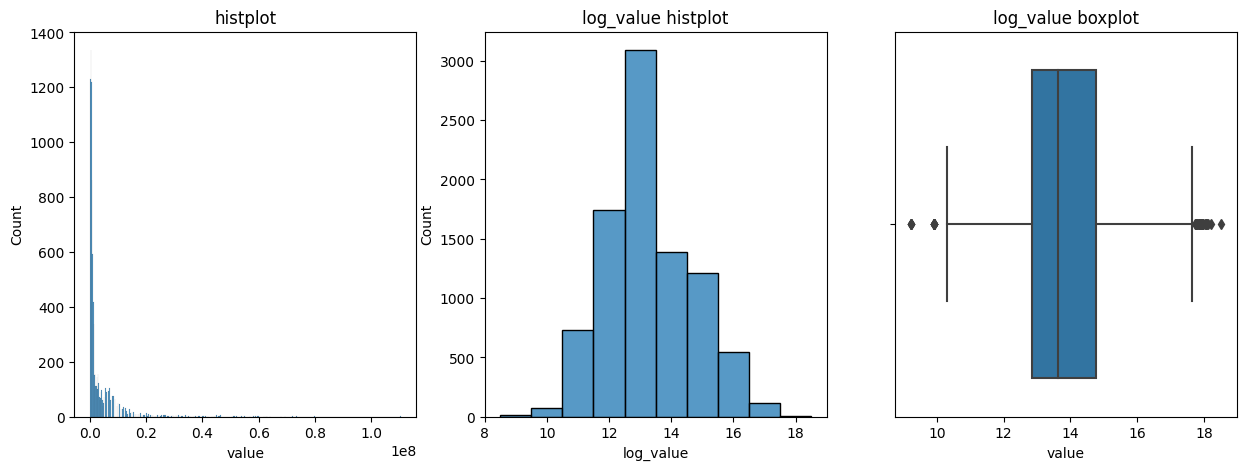

In [ ]:
f , axes = plt.subplots(1,3)
axes = axes.flatten()
f.set_size_inches(15,5)

# value 데이터 분포도
sns.histplot(x="value", data=train, ax=axes[0])
axes[0].set(title = "histplot")

#log_value 데이터 분포도
sns.histplot(x="log_value", data=train, ax=axes[1])
axes[1].set(title = "log_value histplot")

# log_value 데이터 이상치 확인
sns.boxplot(x=np.log(train["value"]), data=train, ax=axes[2])
axes[2].set(title = "log_value boxplot")



value값의 여러가지 형태로 시각화<br>
-> 이적료간의 편차가 있음, log_valuer가 13인 값이 제일 많이 존재함

### 3.2 인기도와 현재 능력관계에 대한 선수의 가치

In [ ]:
train['reputation'].unique()

array([5., 4., 3., 1., 2.])

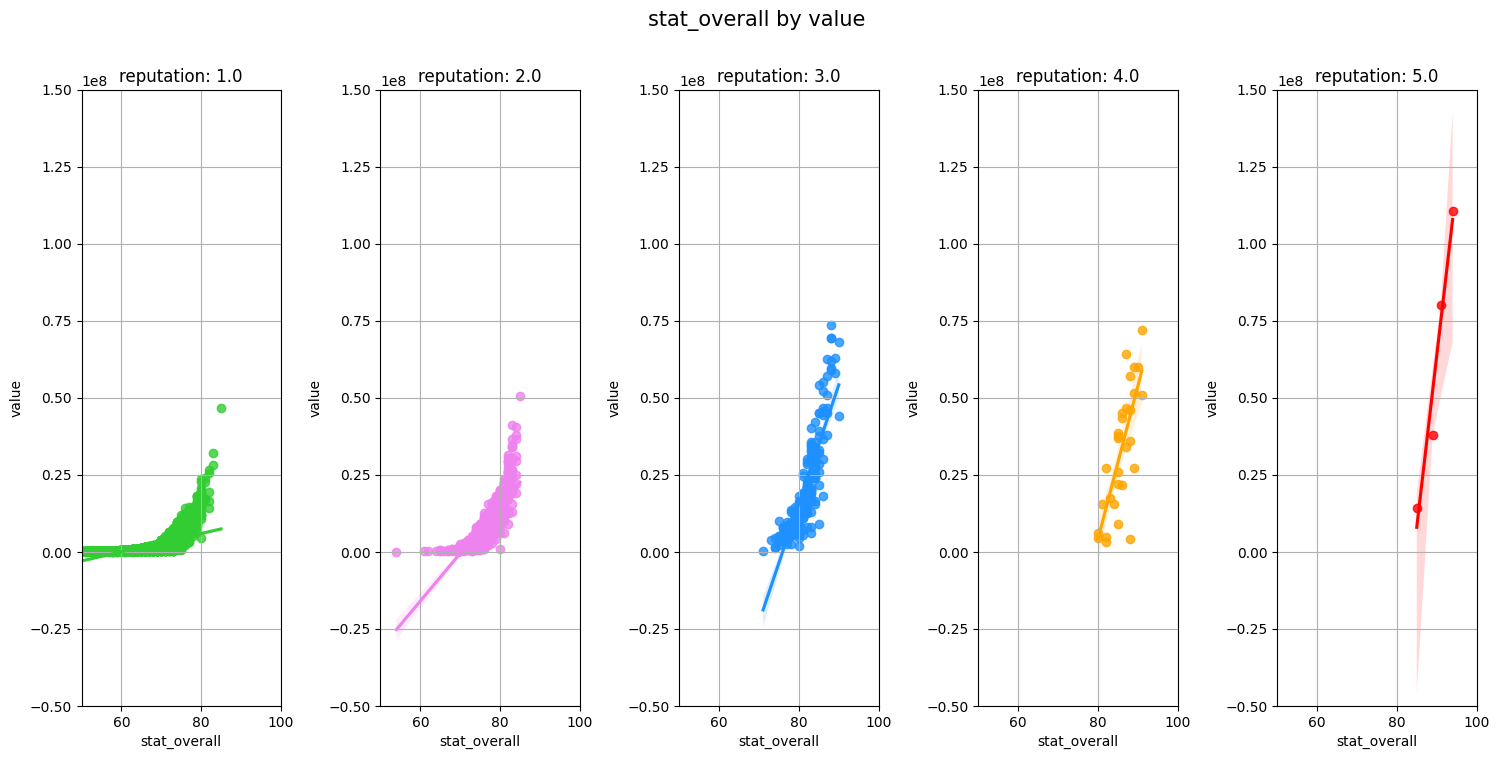

In [ ]:
key=train.groupby('reputation').groups.keys()

color=['limegreen','violet','dodgerblue','orange','red']


def flatten_cols (title,col):
  fig, axs = plt.subplots( ncols=int(len(key)), 
  figsize=(18,8),gridspec_kw={'wspace': .5})
  fig.suptitle(title, size=15)
  for i,y in enumerate(key):
    ax = axs[i]
    ax.set_title('reputation: '+str(y))
    ax.grid(True)
    ax.axis([50, 100, -50000000, 150000000])
    select_rep=train[train['reputation']==y]
    sns.regplot(x=col, y='value',color=color[i],
    data=select_rep, ax=ax)
  
flatten_cols('stat_overall by value','stat_overall')

인기 등급이 높아질수록 현재 능력치가 높음에 따라 value의 값에 많은 영향을 준다. 

### 3.3 잠재능력과 선수능력 사이의 이적료

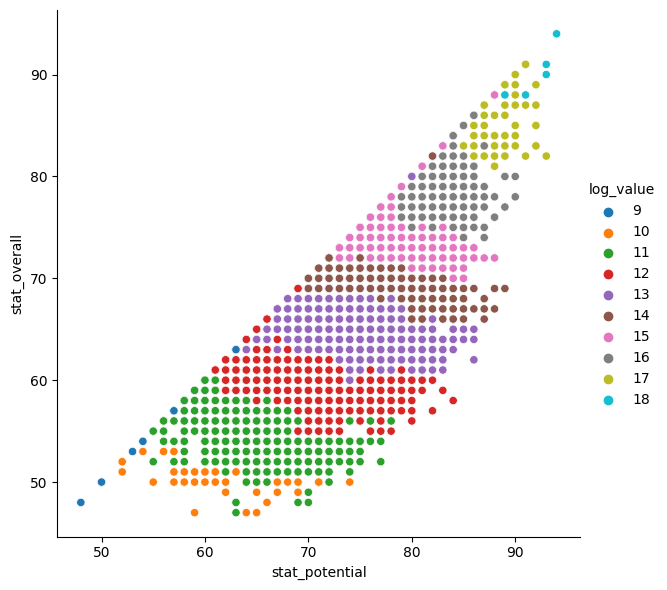

In [ ]:
sns.relplot(
    x='stat_potential',
    y='stat_overall',
    data=train,
    hue='log_value'
    ,alpha=1,
    height=6
)

### 3.4 이적료와 인기도관계

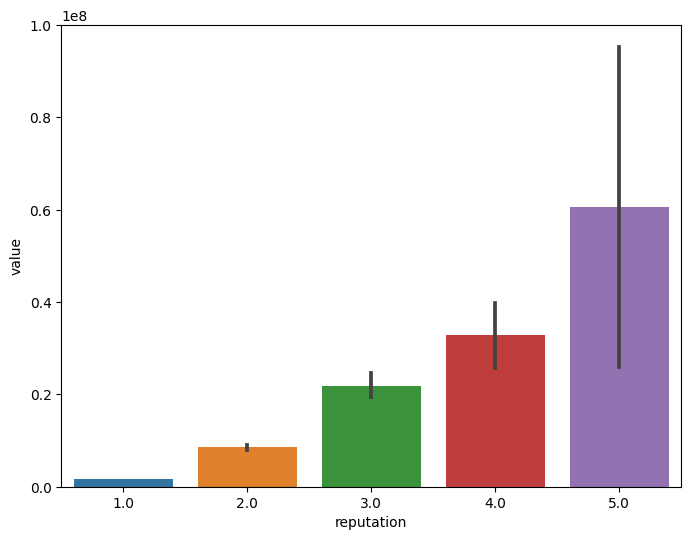

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))    
sns.barplot(y='value', x='reputation', data=train, ax=ax)
fig.savefig('c13-sns3.png', dpi=300, bbox_inches='tight')

유명도가 높을 수록 이적료가 높음<br>
티켓 판매부터 유니폼 판매, TV 중계료 및 광고료 등 선수  이적료 그 이상의 수입이 보장되기 때문에 구단의 비즈니스에 중요한 역할이 된다. 

### 3.4 이적료와 계약기간

In [ ]:
train['contract_until'].unique()

array([2021, 2020, 2019, 2023, 2022, 2018])

<Axes: title={'center': 'contract_untill per value'}, xlabel='contract_until', ylabel='value'>

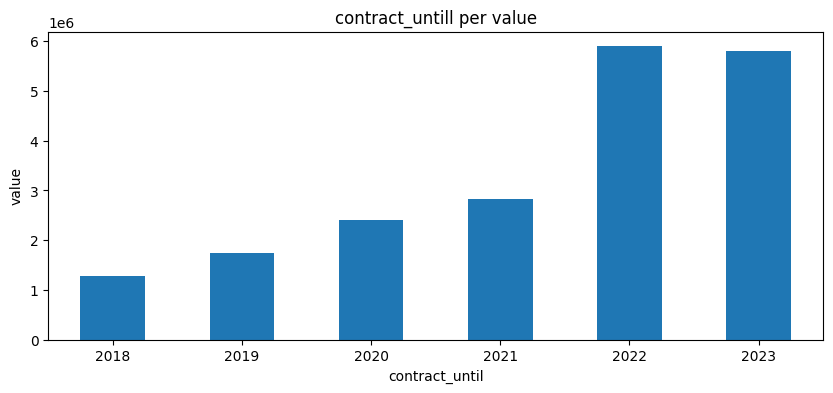

In [ ]:
#계약연도를 기준으로 이적료의 평균을 반환
fig, ax = plt.subplots(figsize=(10,4))
plt.ylabel('value')

(
train.groupby('contract_until')['value']
.agg(['mean','count'])
.plot.bar(y='mean',rot=0,legend=False,ax=ax,
          title='contract_untill per value')

)

그룹별 이적료는 2022년 계약만료된 선수들이 평균적으로 제일 높다. 

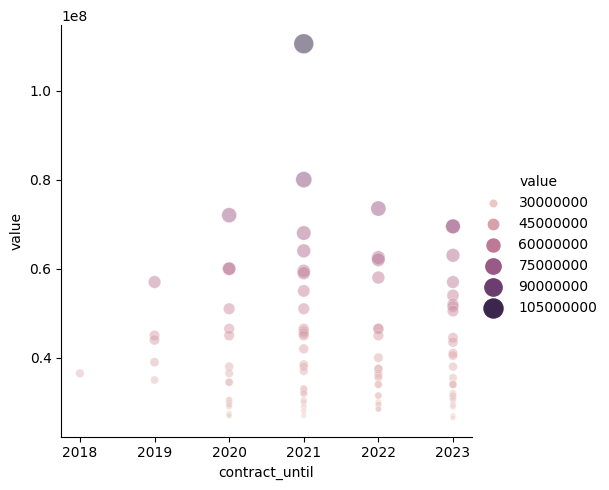

In [ ]:
#그룹별 평균 이적률은 22년이 가장 높지만 가장 높은 이적률을 찍고 있는 그룹은 2021이다

col=['contract_until','stat_overall','stat_potential','stat_skill_moves','reputation','value','log_value']
higher_group=train[col].sort_values('value', ascending=False).head(100)

sns.relplot(
    x='contract_until',
    y='value',
    data=higher_group,
    hue='value',
    alpha=.5,
    height=5,
    size="value"
    ,sizes=(15,200)
  
)



계약기간에 따른 이적료를 비료해보면, 상대적으로 기간이 많은 선수들의 이적료값이 더욱 높다. 

In [ ]:
train.corr().style.background_gradient()


<ipython-input-26-b18bfc3fbae0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr().style.background_gradient()


,age,contract_until,reputation,stat_overall,stat_potential,stat_skill_moves,value
age,1.000000,-0.129047,0.265125,0.471002,-0.229959,0.041103,0.092290
contract_until,-0.129047,1.000000,0.064229,0.149115,0.248625,0.078431,0.212758
reputation,0.265125,0.064229,1.000000,0.520203,0.397405,0.199659,0.666131
stat_overall,0.471002,0.149115,0.520203,1.000000,0.662961,0.400152,0.657019
stat_potential,-0.229959,0.248625,0.397405,0.662961,1.000000,0.331386,0.607918
stat_skill_moves,0.041103,0.078431,0.199659,0.400152,0.331386,1.000000,0.300817
value,0.092290,0.212758,0.666131,0.657019,0.607918,0.300817,1.000000


##**4. 결론**

<h4>현황<br></h4>

<li>나이는 평균 25세이며 16살부터 40살 까지 있습니다.<br>
 <li>선수들의 현재 능력치는 67가 평균이며 최소 47, 최대 94를 가지고 있습니다.<br>
<li>선수들의 발전 가능성은 72이 평균이며 최소 48, 최대 94까지 발전할 수 있습니다.<br>
<li>이적료는 평균 825,000 유로이며 최소 10,000 유로, 최대 110,500,500 유로입니다.<br>
 </ul>
 <br>
<h4>시사점<br></h4>
<li>선수의 유명도는 대부분 1인 경우가 많으며 등급이 높을 수록 이적료가 높다<br>
<li>선수들의 계약 만료는 2022>2023>2021 년 순으로 이적료가 높다. <br>
<li>이적료는 유명도 ,현재능력치 ,잠재능력순으로 많은 영향을 받는다. <br>

<li>나이와, 국적, 포지션, 주 발은 이적료에 영향을 거의 미치지 않지만 계약 기간은 영향을 준다,